<a href="https://colab.research.google.com/github/brucekim29/colab/blob/main/221012_09_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 09-3 LSTM 과 GRU셀

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # 학습률 0.001 사용하지 않고 별도 객체 만들어 학습률 0.0001을 지정
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

check_p = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[check_p, early_stop])

Epoch 1/100
313/313 [==============================] - 11s 10ms/step - loss: 0.6926 - accuracy: 0.5397 - val_loss: 0.6918 - val_accuracy: 0.5916
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6908 - accuracy: 0.6029 - val_loss: 0.6894 - val_accuracy: 0.6238
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6873 - accuracy: 0.6364 - val_loss: 0.6846 - val_accuracy: 0.6480
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6793 - accuracy: 0.6658 - val_loss: 0.6719 - val_accuracy: 0.6808
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6505 - accuracy: 0.7050 - val_loss: 0.6191 - val_accuracy: 0.7264
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5940 - accuracy: 0.7254 - val_loss: 0.5794 - val_accuracy: 0.7324
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5652 - accuracy: 0.7390 - val_loss: 0.5580 - val_accuracy: 0.74

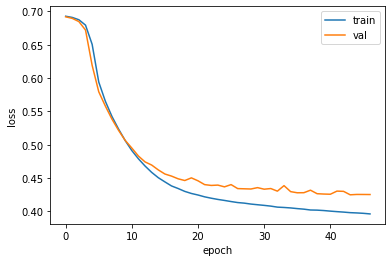

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 순환층에 dropout 적용하기




In [7]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

check_p = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history2 = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[check_p, early_stop])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6929 - accuracy: 0.5234 - val_loss: 0.6923 - val_accuracy: 0.5790
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6912 - accuracy: 0.6004 - val_loss: 0.6901 - val_accuracy: 0.6390
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6874 - accuracy: 0.6487 - val_loss: 0.6844 - val_accuracy: 0.6730
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6740 - accuracy: 0.6762 - val_loss: 0.6551 - val_accuracy: 0.7074
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6186 - accuracy: 0.7104 - val_loss: 0.5923 - val_accuracy: 0.7170
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5829 - accuracy: 0.7218 - val_loss: 0.5677 - val_accuracy: 0.7398
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5602 - accuracy: 0.7433 - val_loss: 0.5510 - val_accuracy: 0.

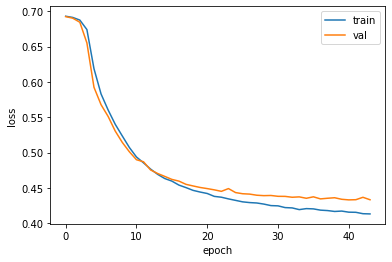

In [9]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 2개의 층을 연결하기


In [10]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

check_p = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history3 = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[check_p, early_stop])

Epoch 1/100
313/313 [==============================] - 7s 15ms/step - loss: 0.6924 - accuracy: 0.5391 - val_loss: 0.6916 - val_accuracy: 0.5780
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6884 - accuracy: 0.6109 - val_loss: 0.6843 - val_accuracy: 0.6446
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6663 - accuracy: 0.6607 - val_loss: 0.6394 - val_accuracy: 0.6708
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5883 - accuracy: 0.7095 - val_loss: 0.5636 - val_accuracy: 0.7214
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5444 - accuracy: 0.7318 - val_loss: 0.5329 - val_accuracy: 0.7356
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5198 - accuracy: 0.7484 - val_loss: 0.5104 - val_accuracy: 0.7514
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5028 - accuracy: 0.7613 - val_loss: 0.5008 - val_accuracy:

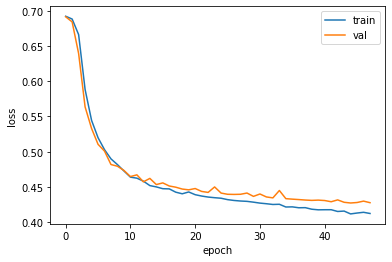

In [13]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

GRU 구조
1. Grated Recurrent Unit (GRU)

In [14]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

check_p = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history4 = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[check_p, early_stop])

Epoch 1/100
313/313 [==============================] - 4s 9ms/step - loss: 0.6924 - accuracy: 0.5189 - val_loss: 0.6915 - val_accuracy: 0.5224
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6902 - accuracy: 0.5437 - val_loss: 0.6891 - val_accuracy: 0.5464
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6869 - accuracy: 0.5716 - val_loss: 0.6854 - val_accuracy: 0.5632
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6819 - accuracy: 0.5884 - val_loss: 0.6799 - val_accuracy: 0.5900
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6748 - accuracy: 0.6045 - val_loss: 0.6725 - val_accuracy: 0.6006
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6649 - accuracy: 0.6245 - val_loss: 0.6625 - val_accuracy: 0.6134
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6514 - accuracy: 0.6363 - val_loss: 0.6482 - val_accuracy: 0.63

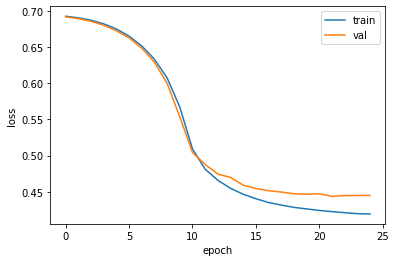

In [17]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()